# Domestic Flight Delays and Cancellations in the U.S. in 2008
## by Nanako Ohashi

## Investigation Overview

> #### Main Points of the Presentation:
1. Percentage of flight cancellations
2. Causes of flight cancellations
3. Types of cancellations by month
4. Percent of flights delayed by month
5. Average delay length by month
6. Types of cancellations by day of week
7. Percent of flights delayed by day of week
8. Average delay length by day of week

## Dataset Overview

> In 2008, there were 7,009,728 domestic flights in the U.S. This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, for 2008. This dataset was obtained from the RITA (Research and Technology Bureau of Transportation Statistics).

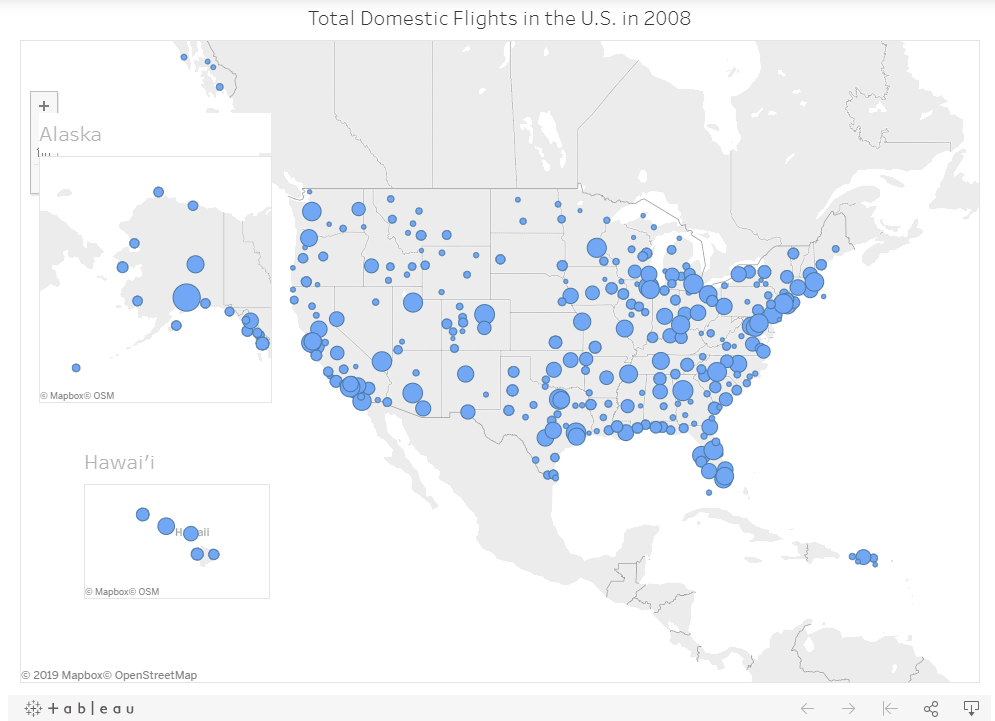

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_2008s = pd.read_csv('2008.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## How many domestic flights were cancelled in 2008?

> Almost 2 in every 100 domestic flights were cancelled in the U.S. in 2008.

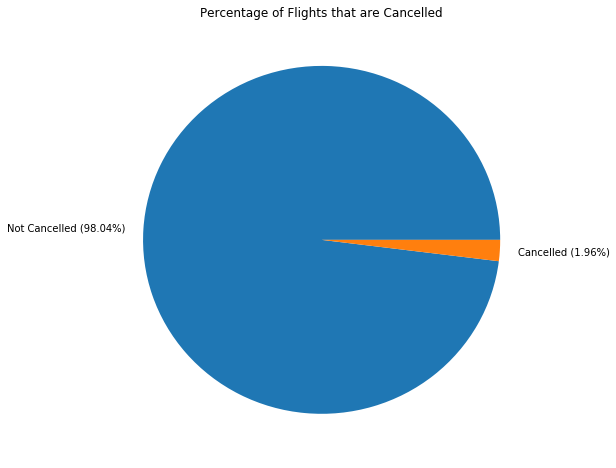

In [11]:
df_cancelled = df_2008s['Cancelled'].value_counts()
df_cancelled = df_cancelled.reset_index()
cancelled_percent = df_cancelled.Cancelled[1] / (df_cancelled.Cancelled[0] + df_cancelled.Cancelled[1]) * 100
cancelled_percent = str(round(cancelled_percent, 2)) + "%"
not_cancelled_percent = df_cancelled.Cancelled[0] / (df_cancelled.Cancelled[0] + df_cancelled.Cancelled[1]) * 100
not_cancelled_percent = str(round(not_cancelled_percent, 2)) + "%"
df_cancelled.Cancelled.plot(kind= 'pie', labels = ['Not Cancelled (' + not_cancelled_percent + ')', 'Cancelled (' + cancelled_percent + ')'], figsize=(8,8))
plt.title("Percentage of Flights that are Cancelled")
plt.ylabel("");

## Causes of Flight Cancellations

> Weather was the most common cause of flight cancellations, while security was the least.

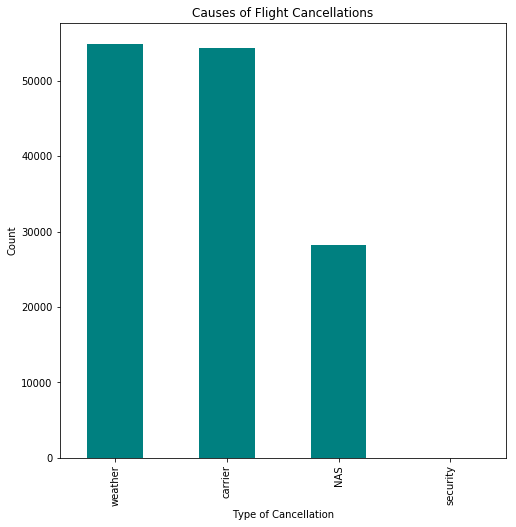

In [4]:
df_2008s['CancellationCode'].value_counts()
df_2008s['CancellationCode'].replace({'A': 'carrier', 'B': 'weather', 'C': 'NAS', 'D': 'security'}, inplace = True)
# A = carrier, B = weather, C = NAS, D = security
df_2008s['CancellationCode'].value_counts().plot(kind= 'bar', color = 'teal', figsize=(8,8))
plt.title("Causes of Flight Cancellations")
plt.ylabel("Count")
plt.xlabel("Type of Cancellation")
plt.show();

## Types of Flight Cancellations by Month
> Carrier is the most common monthly cause for flight cancellations, followed by weather. Security cancellations are the least common cause for cancellations for all months.

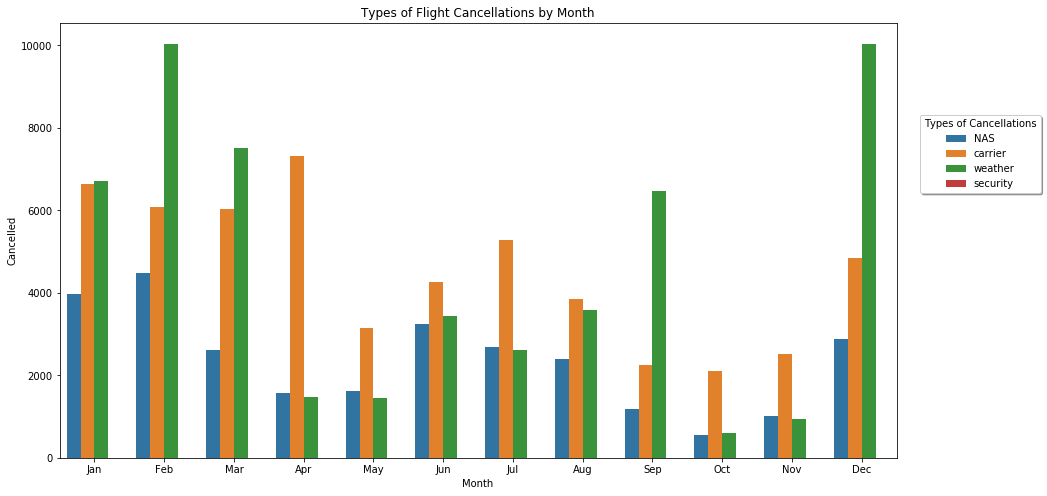

In [5]:
df_cancelled_mv1 = df_2008s.groupby(['Month', 'CancellationCode'])['Cancelled'].count()
df_cancelled_mv1 = df_cancelled_mv1.reset_index()
df_cancelled_mv1['Month'] = df_cancelled_mv1['Month'].apply(lambda x: calendar.month_abbr[x])
plt.figure(figsize=(15,8))
ax = sb.barplot(data = df_cancelled_mv1, x = 'Month', y = 'Cancelled', hue = 'CancellationCode')
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1, title = 'Types of Cancellations')
ax.set_title('Types of Flight Cancellations by Month');

## Percent of Flights Delayed by Month and Type
> Weather and late carrier delays have the highest percentage of delays of total monthly flights amd security has the least percentage of delays of total monthly flights.

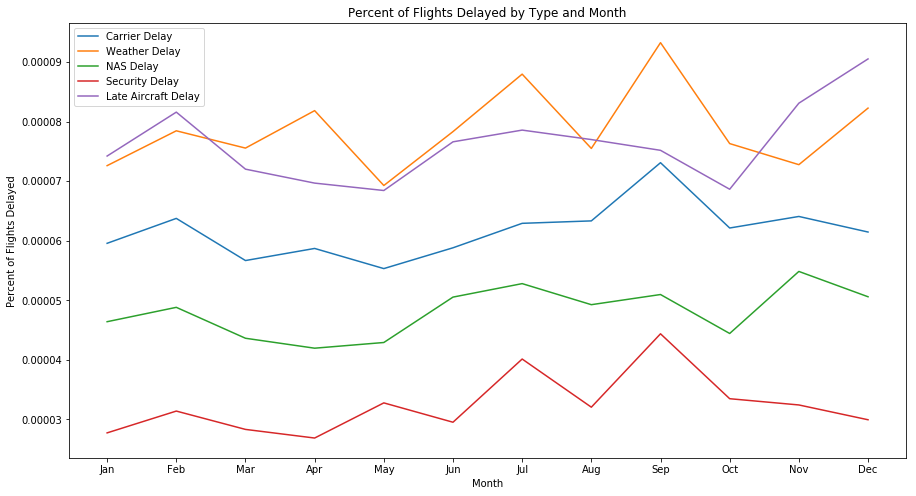

In [6]:
df_2008s_month_value_counts = df_2008s.Month.value_counts().reset_index()
df_2008s_month_value_counts.columns = ["Month", "Total_Flights"]
df_2008s_month_value_counts = df_2008s_month_value_counts.sort_values(by=['Month'])
df_2008s_month_value_counts['Month'] = df_2008s_month_value_counts['Month'].apply(lambda x: calendar.month_abbr[x])
df_flights_by_month = df_2008s_month_value_counts.reset_index()
df_flights_by_month = df_flights_by_month.drop(columns=['index'])
df_delay_carrier_0 = df_2008s.dropna(subset=['CarrierDelay'])
df_delay_carrier_0 = df_delay_carrier_0[df_delay_carrier_0['CarrierDelay']!=0]
df_delay_carrier_1 = df_delay_carrier_0.groupby(['Month'])['CarrierDelay'].mean()
df_delay_carrier_1 = df_delay_carrier_1.reset_index()
df_delay_weather_0 = df_2008s.dropna(subset=['WeatherDelay'])
df_delay_weather_0 = df_delay_weather_0[df_delay_weather_0['WeatherDelay']!=0]
df_delay_weather_1 = df_delay_weather_0.groupby(['Month'])['WeatherDelay'].mean()
df_delay_weather_1 = df_delay_weather_1.reset_index()
df_delay_NAS_0 = df_2008s.dropna(subset=['NASDelay'])
df_delay_NAS_0 = df_delay_NAS_0[df_delay_NAS_0['NASDelay']!=0]
df_delay_NAS_1 = df_delay_NAS_0.groupby(['Month'])['NASDelay'].mean()
df_delay_NAS_1 = df_delay_NAS_1.reset_index()
df_delay_security_0 = df_2008s.dropna(subset=['SecurityDelay'])
df_delay_security_0 = df_delay_security_0[df_delay_security_0['SecurityDelay']!=0]
df_delay_security_1 = df_delay_security_0.groupby(['Month'])['SecurityDelay'].mean()
df_delay_security_1 = df_delay_security_1.reset_index()
df_delay_aircraft_0 = df_2008s.dropna(subset=['LateAircraftDelay'])
df_delay_aircraft_0 = df_delay_aircraft_0[df_delay_aircraft_0['LateAircraftDelay']!=0]
df_delay_aircraft_1 = df_delay_aircraft_0.groupby(['Month'])['LateAircraftDelay'].mean()
df_delay_aircraft_1 = df_delay_aircraft_1.reset_index()
df_delay = pd.merge(df_delay_carrier_1, df_delay_weather_1, on='Month', how='outer')
df_delay = pd.merge(df_delay, df_delay_NAS_1, on='Month', how='outer')
df_delay = pd.merge(df_delay, df_delay_security_1, on='Month', how='outer')
df_delay = pd.merge(df_delay, df_delay_aircraft_1, on='Month', how='outer')
df_delay['Month'] = df_delay['Month'].apply(lambda x: calendar.month_abbr[x])
df_delay2 = df_delay.copy()
df_delay3 = df_delay2[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]].div(df_flights_by_month.Total_Flights, axis=0)
df_delay3.insert(0, "Month", df_delay2["Month"], True)
ax = df_delay3.plot(x="Month", y=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"], kind="line", title='Percent of Flights Delayed by Type and Month', figsize=(15,8))
plt.xticks(range(0,12),df_delay["Month"])
leg = plt.legend().get_texts()
leg[0].set_text('Carrier Delay')
leg[1].set_text('Weather Delay')
leg[2].set_text('NAS Delay')
leg[3].set_text('Security Delay')
leg[4].set_text('Late Aircraft Delay')
ax.set_ylabel('Percent of Flights Delayed');

## Average Delay Length by Month
> Results were similar to that of percent of delays by month where weather and late carrier delays have the longest average duration of delay of total monthly flights amd security has the shortest duration of delay of total monthly flights.

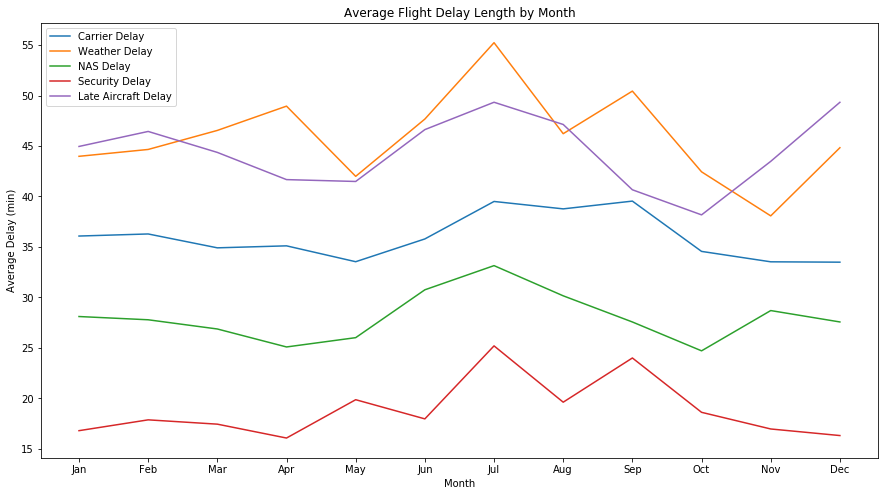

In [7]:
ax = df_delay.plot(x="Month", y=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"], kind="line", title='Average Flight Delay Length by Month', figsize=(15,8))
plt.xticks(range(0,12),df_delay["Month"])
leg = plt.legend().get_texts()
leg[0].set_text('Carrier Delay')
leg[1].set_text('Weather Delay')
leg[2].set_text('NAS Delay')
leg[3].set_text('Security Delay')
leg[4].set_text('Late Aircraft Delay')
ax.set_ylabel('Average Delay (min)');

## Types of Flight Cancellations by Day of Week
> Weather is the most common weekly cause for flight cancellations, followed by carrier. Security cancellations are the least common cause for cancellations for all days of the week.

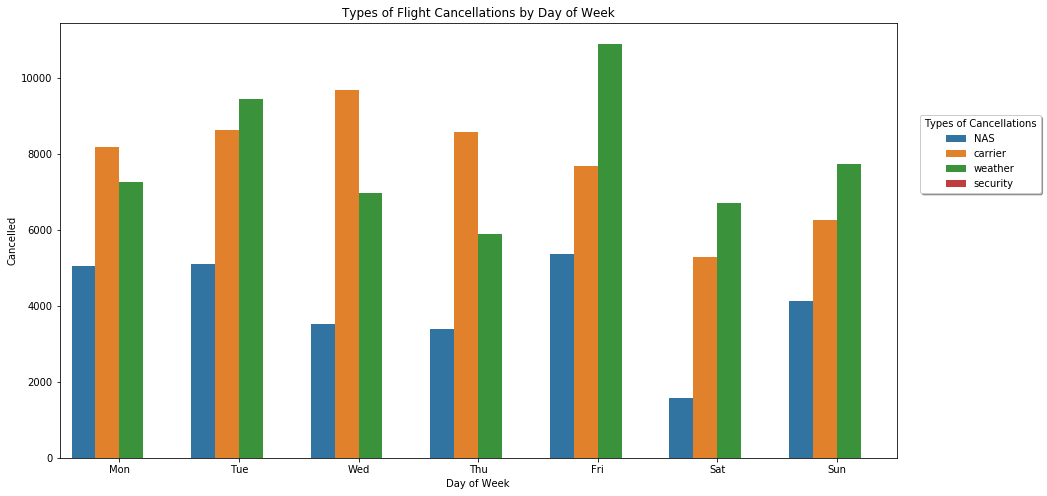

In [8]:
df_cancelled_mv = df_2008s.groupby(['DayOfWeek', 'CancellationCode'])['Cancelled'].count()
df_cancelled_mv = df_cancelled_mv.reset_index()
df_cancelled_mv['DayOfWeek'] = df_cancelled_mv['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])
plt.figure(figsize=(15,8))
ax = sb.barplot(data = df_cancelled_mv, x = 'DayOfWeek', y = 'Cancelled', hue = 'CancellationCode')
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1, title = 'Types of Cancellations')
ax.set_title('Types of Flight Cancellations by Day of Week')
ax.set_xlabel('Day of Week');

## Percent of Flights Delayed by Day of Week
> Weather and late carrier delays have the highest percentage of delays of total weekly flights and security has the least percentage of delays of total weekly flights.

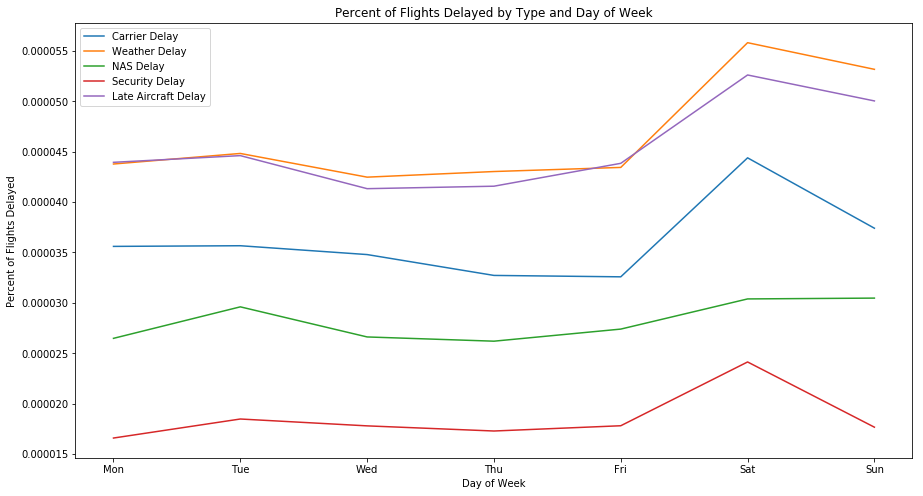

In [9]:
df_2008s_day_value_counts = df_2008s.DayOfWeek.value_counts().reset_index()
df_2008s_day_value_counts.columns = ["DayOfWeek", "Total_Flights"]
df_2008s_day_value_counts = df_2008s_day_value_counts.sort_values(by=['DayOfWeek'])
df_2008s_day_value_counts['DayOfWeek'] = df_2008s_day_value_counts['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])
df_day_value_counts = df_2008s_day_value_counts.reset_index()
df_day_value_counts = df_day_value_counts.drop(columns=['index'])
df_delay_car_0 = df_2008s.dropna(subset=['CarrierDelay'])
df_delay_car_0 = df_delay_car_0[df_delay_car_0['CarrierDelay']!=0]
df_delay_car_1 = df_delay_car_0.groupby(['DayOfWeek'])['CarrierDelay'].mean()
df_delay_car_1 = df_delay_car_1.reset_index()
df_delay_wea_0 = df_2008s.dropna(subset=['WeatherDelay'])
df_delay_wea_0 = df_delay_wea_0[df_delay_wea_0['WeatherDelay']!=0]
df_delay_wea_1 = df_delay_wea_0.groupby(['DayOfWeek'])['WeatherDelay'].mean()
df_delay_wea_1 = df_delay_wea_1.reset_index()
df_delay_NAS1_0 = df_2008s.dropna(subset=['NASDelay'])
df_delay_NAS1_0 = df_delay_NAS1_0[df_delay_NAS1_0['NASDelay']!=0]
df_delay_NAS1_1 = df_delay_NAS1_0.groupby(['DayOfWeek'])['NASDelay'].mean()
df_delay_NAS1_1 = df_delay_NAS1_1.reset_index()
df_delay_sec_0 = df_2008s.dropna(subset=['SecurityDelay'])
df_delay_sec_0 = df_delay_sec_0[df_delay_sec_0['SecurityDelay']!=0]
df_delay_sec_1 = df_delay_sec_0.groupby(['DayOfWeek'])['SecurityDelay'].mean()
df_delay_sec_1 = df_delay_sec_1.reset_index()
df_delay_air_0 = df_2008s.dropna(subset=['LateAircraftDelay'])
df_delay_air_0 = df_delay_air_0[df_delay_air_0['LateAircraftDelay']!=0]
df_delay_air_1 = df_delay_air_0.groupby(['DayOfWeek'])['LateAircraftDelay'].mean()
df_delay_air_1 = df_delay_air_1.reset_index()
df_delay1 = pd.merge(df_delay_car_1, df_delay_wea_1, on='DayOfWeek', how='outer')
df_delay1 = pd.merge(df_delay1, df_delay_NAS1_1, on='DayOfWeek', how='outer')
df_delay1 = pd.merge(df_delay1, df_delay_sec_1, on='DayOfWeek', how='outer')
df_delay1 = pd.merge(df_delay1, df_delay_air_1, on='DayOfWeek', how='outer')
df_delay1['DayOfWeek'] = df_delay1['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])
df_delayw = df_delay1.copy()
df_delayw1 = df_delayw[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]].div(df_day_value_counts.Total_Flights, axis=0)
df_delayw1.insert(0, "DayOfWeek", df_delay1["DayOfWeek"], True)
ax = df_delayw1.plot(x="DayOfWeek", y=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"], kind="line", title='Percent of Flights Delayed by Type and Day of Week', figsize=(15,8))
plt.xticks(range(0,7),df_delayw1["DayOfWeek"])
leg = plt.legend().get_texts()
leg[0].set_text('Carrier Delay')
leg[1].set_text('Weather Delay')
leg[2].set_text('NAS Delay')
leg[3].set_text('Security Delay')
leg[4].set_text('Late Aircraft Delay')
ax.set_ylabel('Percent of Flights Delayed')
ax.set_xlabel('Day of Week');

## Average Flight Delay Length by Day of Week
>Weather and late carrier delays had the longest average delay length. Security delays had the shortest average delay length for all days of the week.

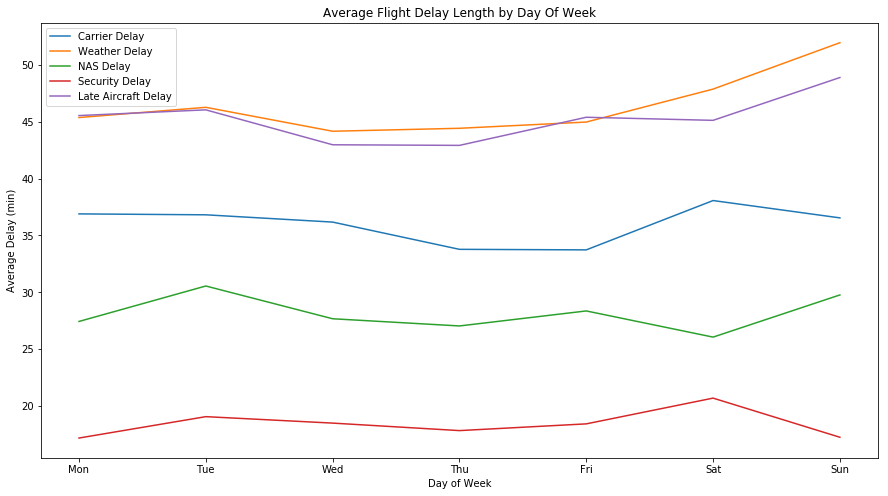

In [10]:
ax = df_delay1.plot(x="DayOfWeek", y=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"], kind="line", title='Average Flight Delay Length by Day Of Week', figsize=(15,8))
plt.xticks(range(0,7),df_delay1["DayOfWeek"])
leg = plt.legend().get_texts()
leg[0].set_text('Carrier Delay')
leg[1].set_text('Weather Delay')
leg[2].set_text('NAS Delay')
leg[3].set_text('Security Delay')
leg[4].set_text('Late Aircraft Delay')
ax.set_ylabel('Average Delay (min)')
ax.set_xlabel('Day of Week');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!